## WHO data - Income Group Classification

## Context 
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. The NGO is working on improving the policies with respect to the income of the needful people so that workers can be paid according to the work and also introduce some programs to enhance the skills of the work which will eventually help in the overall development of the nation. The NGO has received the dataset by the government and needs to be analyzed thoroughly. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal with the government

### Objective

1. Understand the different factors that influence the income of an individual.
2. To build a prediction model that can help the government formulate policies for the right pockets of the society.

### Dataset

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - 
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Loading Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)  # adds background

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.

### Load data

In [2]:
who = pd.read_csv("who_data.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
data.shape

(32561, 15)

<IPython.core.display.Javascript object>

* The dataset has 32561 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

<IPython.core.display.Javascript object>

### Summary of the dataset.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


<IPython.core.display.Javascript object>

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. 
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

#### Replacing ? with 'Unknown'

In [4]:
data.workclass = data.workclass.apply(lambda x: "Unknown" if x == " ?" else x)
data.native_country = data.native_country.apply(lambda x: "Unknown" if x == " ?" else x)
data.occupation = data.occupation.apply(lambda x: "Unknown" if x == " ?" else x)

#### Mapping countries to continents to reduce the number of unique values.
##### Number of labels: Cardinality
* The number of labels within a categorical variable is known as cardinality.

* A high number of labels within a variable is known as high cardinality.

* High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [12]:
data.native_country.nunique()

42

* There are 42 distinct countries in the data set, we can reduce them to their respective continents as this will help us reduce the dimension of data and cardinality.

In [6]:
data.native_country = data.native_country.str.replace(
    " ", ""
)  # remove empty spaces from strings

In [7]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown", "?"]

In [8]:
def region_combining(x):
    if x in north_america:
        return "north_america"
    elif x in asia:
        return "asia"
    elif x in south_america:
        return "south_america"
    elif x in europe:
        return "europe"
    elif x in other:
        return "other"
    else:
        return x

In [9]:
data["native_country"] = data["native_country"].apply(region_combining)

In [17]:
print("Distinct values in Native Country column:", data.native_country.nunique())

Distinct values in Native Country column: 5


#### Reducing the number of distinct values in marital_status

In [18]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We can reduce these values into the following groups:
* Married
* Not-Married
* Never-Married

In [10]:
data.marital_status = data.marital_status.str.replace(
    " ", ""
)  # remove empty spaces from strings

married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x

In [11]:
data.marital_status = data.marital_status.apply(reduce_marital_status)

In [12]:
data.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

* Values have been clubbed into three categories.

## Bivariate analysis

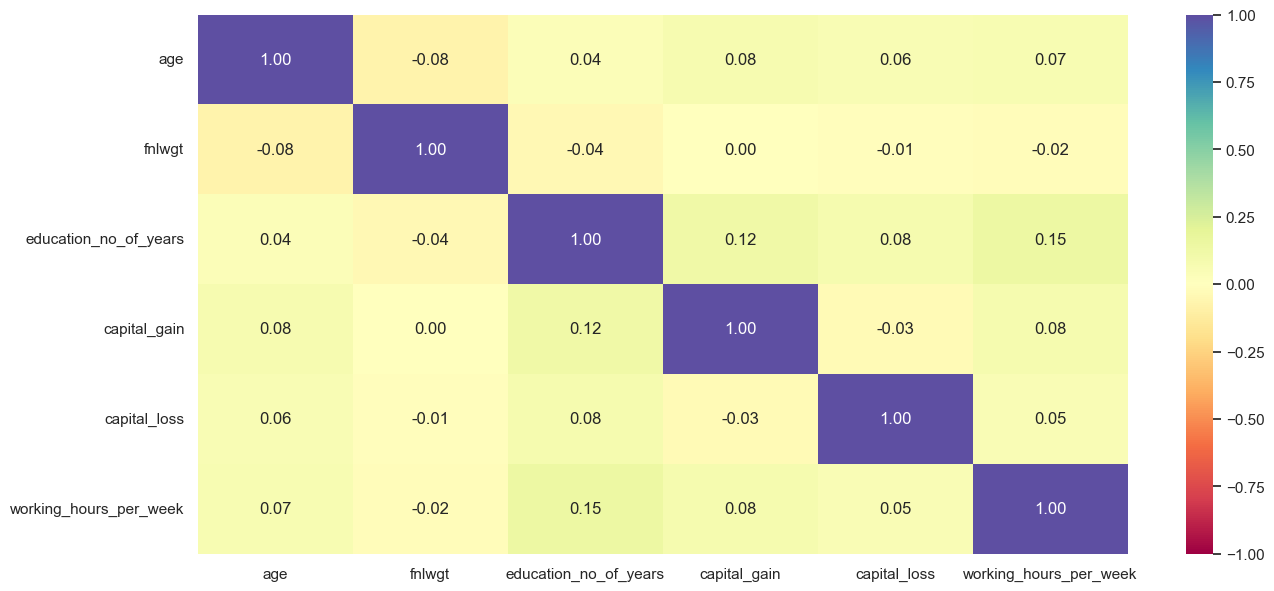

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

In [23]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[1]
    tab1 = pd.crosstab(data[predictor], data[target]).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    print(tab)
    print("-" * 120)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

salary    <=50K   >50K
sex                   
 Male     15128   6662
 Female    9592   1179
------------------------------------------------------------------------------------------------------------------------
salary      <=50K      >50K
sex                        
 Male    0.694263  0.305737
 Female  0.890539  0.109461
------------------------------------------------------------------------------------------------------------------------


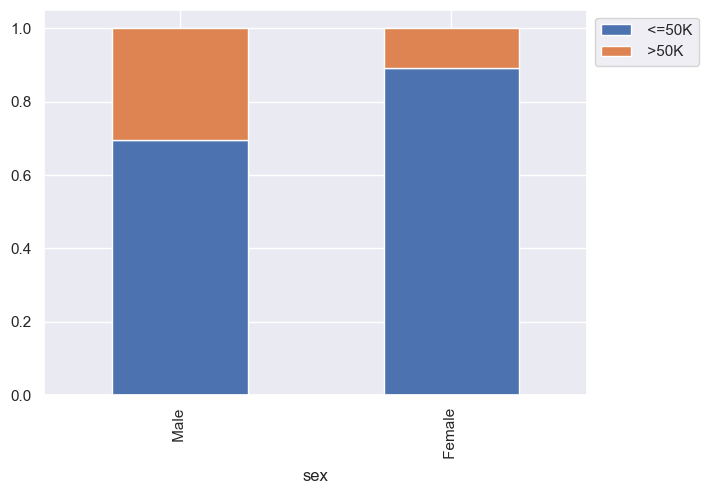

In [25]:
stacked_barplot(data, "sex", "salary")

* ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.

### salary vs education

salary          <=50K   >50K
education                   
 Bachelors       3134   2221
 HS-grad         8826   1675
 Some-college    5904   1387
 Masters          764    959
 Prof-school      153    423
 Assoc-voc       1021    361
 Doctorate        107    306
 Assoc-acdm       802    265
 10th             871     62
 11th            1115     60
 7th-8th          606     40
 12th             400     33
 9th              487     27
 5th-6th          317     16
 1st-4th          162      6
 Preschool         51      0
------------------------------------------------------------------------------------------------------------------------
salary            <=50K      >50K
education                        
 Doctorate     0.259080  0.740920
 Prof-school   0.265625  0.734375
 Masters       0.443413  0.556587
 Bachelors     0.585247  0.414753
 Assoc-voc     0.738784  0.261216
 Assoc-acdm    0.751640  0.248360
 Some-college  0.809765  0.190235
 HS-grad       0.840491  0.159509
 12th          0.

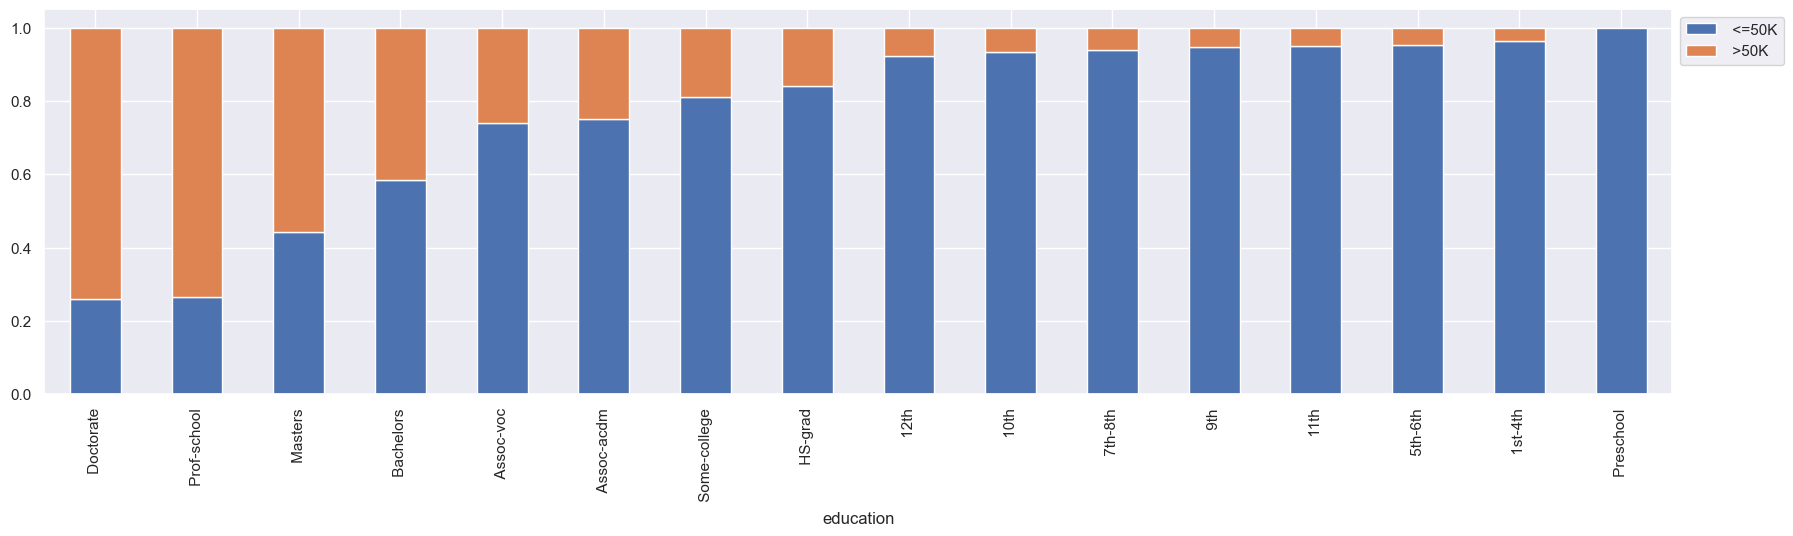

In [26]:
stacked_barplot(data, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

### salary vs occupation

salary               <=50K   >50K
occupation                       
 Exec-managerial      2098   1968
 Prof-specialty       2281   1859
 Sales                2667    983
 Craft-repair         3170    929
 Adm-clerical         3263    507
 Transport-moving     1277    320
 Tech-support          645    283
 Machine-op-inspct    1752    250
 Protective-serv       438    211
Unknown               1652    191
 Other-service        3158    137
 Farming-fishing       879    115
 Handlers-cleaners    1284     86
 Armed-Forces            8      1
 Priv-house-serv       148      1
------------------------------------------------------------------------------------------------------------------------
salary                 <=50K      >50K
occupation                            
 Exec-managerial    0.515986  0.484014
 Prof-specialty     0.550966  0.449034
 Protective-serv    0.674884  0.325116
 Tech-support       0.695043  0.304957
 Sales              0.730685  0.269315
 Craft-repair       0.773359

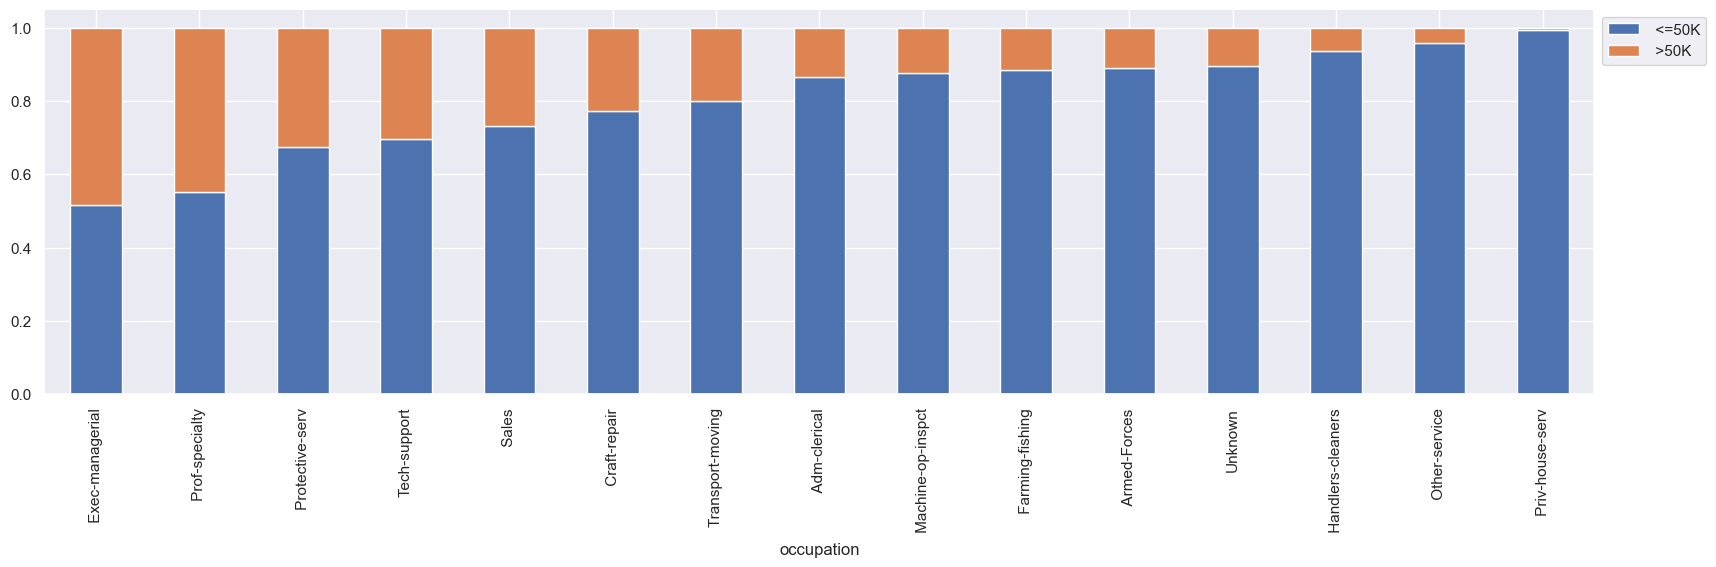

In [27]:
stacked_barplot(data, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

### salary vs workclass

salary              <=50K   >50K
workclass                       
 Private            17733   4963
 Self-emp-not-inc    1817    724
 Self-emp-inc         494    622
 Local-gov           1476    617
 Federal-gov          589    371
 State-gov            945    353
Unknown              1645    191
 Never-worked           7      0
 Without-pay           14      0
------------------------------------------------------------------------------------------------------------------------
salary                <=50K      >50K
workclass                            
 Self-emp-inc      0.442652  0.557348
 Federal-gov       0.613542  0.386458
 Local-gov         0.705208  0.294792
 Self-emp-not-inc  0.715073  0.284927
 State-gov         0.728043  0.271957
 Private           0.781327  0.218673
Unknown            0.895969  0.104031
 Never-worked      1.000000  0.000000
 Without-pay       1.000000  0.000000
--------------------------------------------------------------------------------------------------

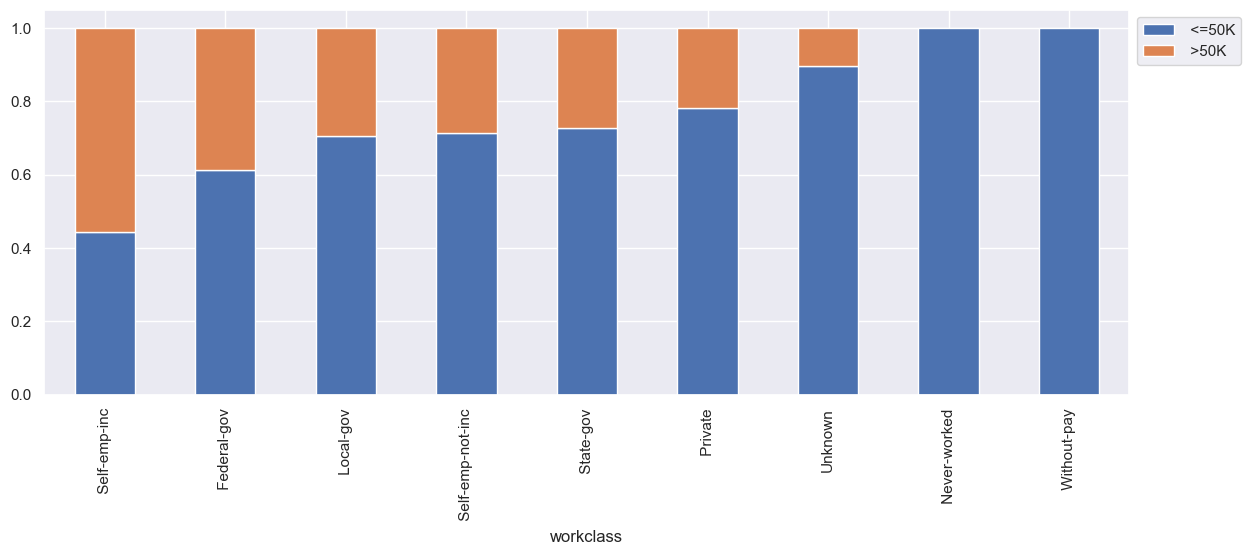

In [28]:
stacked_barplot(data, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

### salary vs marital_status

salary           <=50K   >50K
marital_status               
married           8297   6702
not_married       6231    648
Never-married    10192    491
------------------------------------------------------------------------------------------------------------------------
salary             <=50K      >50K
marital_status                    
married         0.553170  0.446830
not_married     0.905800  0.094200
Never-married   0.954039  0.045961
------------------------------------------------------------------------------------------------------------------------


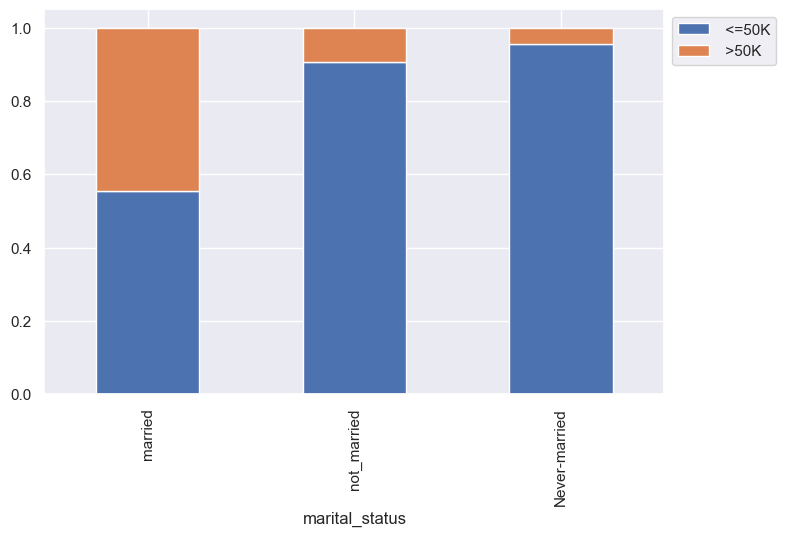

In [30]:
stacked_barplot(data, "marital_status", "salary")

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

### Salary vs Age

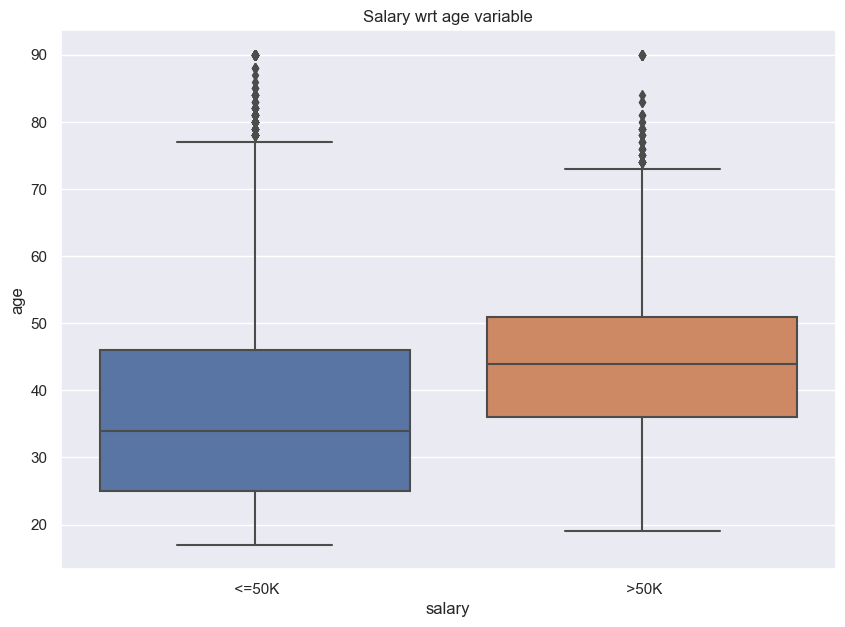

In [31]:
plt.subplots(figsize=(10, 7))
ax = sns.boxplot(x="salary", y="age", data=data)
ax.set_title("Salary wrt age variable")
plt.show()

### Salary vs Hours Per wk

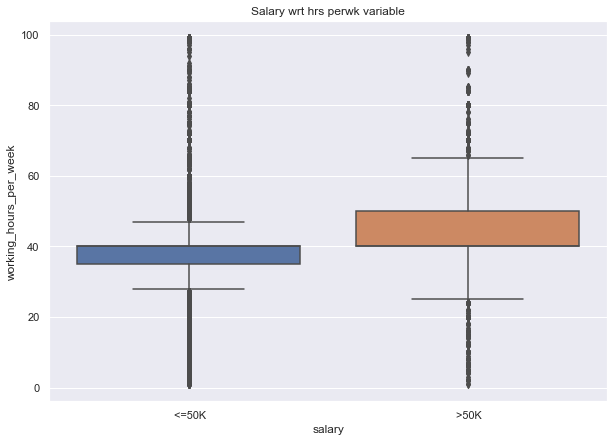

<IPython.core.display.Javascript object>

In [43]:
plt.subplots(figsize=(10, 7))
ax = sns.boxplot(x="salary", y="working_hours_per_week", data=data)
ax.set_title("Salary wrt hrs perwk variable")
plt.show()

* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the salary which is of categorical data type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

**Data Cleaning:**

* We observed that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* For now, we replaced these ?'s with the 'unknown' category.
* There are 42 distinct countries in the data set, which were reduced to their respective continents to reduce the dimension of data and we now have only 5 distinct values in the data.
* We reduced the distinct groups of marital_status to three categories: Married, Not-Married and Never-Married.

**Observations from EDA:**

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `fnlwght`: fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.
* `working_hours_per_week`: Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week. Some of the observations are clear outliers like working  1 hour a week which needs to be treated.
* `workclass`: ~70% of the observations are from the Private sector working class.
* `marita_status`: 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.
* `race`: * 94% of the people are native to north_america followed by 2.1% Asians.
* `salary vs sex`: ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* `salary vs occupation`: - ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above 50,000 dollars. People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.
* `salary vs education`: ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above 50K dollars
* `salary vs working_hours_per_week`: Majority of people having above 50K salary work around 40 hours per week.

### Actions for data pre-processing:

* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables

**Dropping capital_gain and capital_loss**

In [13]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

### Data Preparation

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [14]:
data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

**Creating training and test sets.**

In [15]:
X = data.drop(["salary"], axis=1)
Y = data["salary"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [16]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22792, 57)
Shape of test set :  (9769, 57)
Percentage of classes in training set:
1    0.753335
0    0.246665
Name: salary, dtype: float64
Percentage of classes in test set:
1    0.772853
0    0.227147
Name: salary, dtype: float64


### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.
2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

* If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.

### Precision


Immediately, you can see that Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.<br>
Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

### Recall


So Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).<br> Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative. <br>
For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank. <br>
Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.


### F1 Score
Now if you read a lot of other literature on Precision and Recall, you cannot avoid the other measure, F1 which is a function of Precision and Recall.
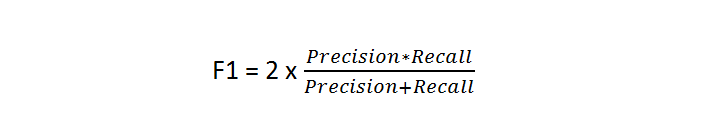
F1 Score is needed when you want to seek a balance between Precision and Recall. <br>
Right, so what is the difference between F1 Score and Accuracy then? We have previously seen that accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible) thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).


### Logistic Regression

In [18]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [19]:
lg.coef_

array([[-2.85243466e-02, -7.56599258e-07, -2.68565036e-01,
        -3.10753912e-02,  6.31039875e-01,  2.09129397e-01,
         4.06915465e-01,  6.38186313e-02,  8.68856899e-01,
         6.64213826e-01,  8.91672009e-01,  4.21086717e-01,
         1.71282858e-01,  6.23026970e-02, -2.39438876e-01,
        -3.07394958e-01,  2.63786570e-02,  2.21057210e-01,
         2.33252973e-01, -9.36905663e-02, -1.63005722e-01,
        -2.78675396e-01, -7.05050613e-02, -2.81457936e-01,
         4.32934368e-01, -6.55825015e-01, -1.47192188e-01,
        -2.11812444e+00, -4.24279761e-01,  2.59181471e-01,
        -1.73308463e-01, -8.43054926e-01,  9.19934923e-01,
         6.35101414e-01,  2.48900097e-01,  9.31729795e-01,
         1.15546618e+00, -5.32757454e-01, -5.54265588e-01,
        -3.08165996e-01, -5.84596546e-01,  7.69851916e-02,
         6.30216114e-01, -1.33149306e-01,  5.71884077e-01,
         1.00544630e+00,  7.28176244e-02, -1.36178108e+00,
        -3.41891415e-01, -2.07686840e-01,  1.19808628e-0

### Finding the coefficients

In [20]:
X_train.columns

Index(['age', 'fnlwgt', 'education_no_of_years', 'working_hours_per_week',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'workclass_Unknown',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_married',
       'marital_status_not_married', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Pri

In [21]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,age,fnlwgt,education_no_of_years,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america,Intercept
Coefficients,-0.028524,-7.565993e-07,-0.268565,-0.031075,0.63104,0.209129,0.406915,0.063819,0.868857,0.664214,0.891672,0.421087,0.171283,0.062303,-0.239439,-0.307395,0.026379,0.221057,0.233253,-0.093691,-0.163006,-0.278675,-0.070505,-0.281458,0.432934,-0.655825,-0.147192,-2.118124,-0.42428,0.259181,-0.173308,-0.843055,0.919935,0.635101,0.2489,0.93173,1.155466,-0.532757,-0.554266,-0.308166,-0.584597,0.076985,0.630216,-0.133149,0.571884,1.005446,0.072818,-1.361781,-0.341891,-0.207687,0.119809,-0.354289,-0.78477,-0.396319,-0.233737,0.122057,1.314148,9.067205


### Coefficient interpretations

* Coefficient of age, fnlwgt, education_no_of_years,working_hours_per_week,sex_Male, some levels of education and marital_status, occupation, race and native country are negative, increase in these will lead to decrease in chances of a person having <=50K salary. 
* Coefficient of some levels of occupation, race, native country positive increase in these will lead to increase in chances of a person having <=50K salary.

#### Create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [ ]:
0.27

In [1]:
0.27 > 0.5

False

In [2]:
np.round(False)

<IPython.core.display.Javascript object>

0.0

In [3]:
0.7 > 0.5

True

In [4]:
np.round(True)

<IPython.core.display.Javascript object>

1.0

In [41]:
model.predict_proba(X_test)[:, 1]

array([0.9921129 , 0.99841959, 0.98250074, ..., 0.39072575, 0.9719584 ,
       0.9957176 ])

In [30]:
pred_prob = model.predict_proba(X_test)[:, 1]
pred_con = pred_prob > 0.5
pred = np.round(pred_con)

In [31]:
pred_prob

array([0.9921129 , 0.99841959, 0.98250074, ..., 0.39072575, 0.9719584 ,
       0.9957176 ])

In [49]:
pred_con

array([ True,  True,  True, ..., False,  True,  True])

In [50]:
pred

array([1., 1., 1., ..., 0., 1., 1.], dtype=float16)

In [22]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
      lg, X_test, y_test
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables X's
    target: dependent variable (y_actual)
    pred:
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_con = pred_prob > threshold
    pred = np.round(pred_con)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [1]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_con = pred_prob > threshold
    y_pred = np.round(pred_con)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label") 

#### Checking model performance on training set

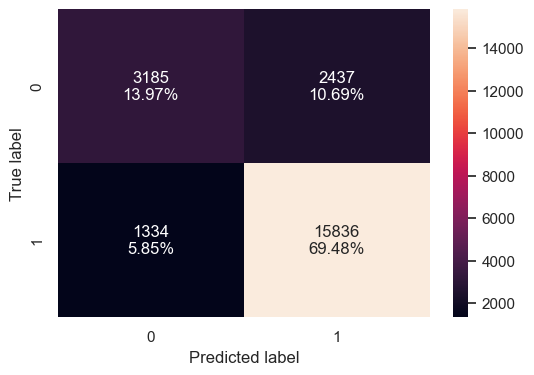

In [24]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [25]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.834547,0.922306,0.866634,0.893604


Training performance:


,Accuracy,Recall,Precision,F1
0,0.753335,1.0,0.753335,0.859316


#### Checking performance on test set

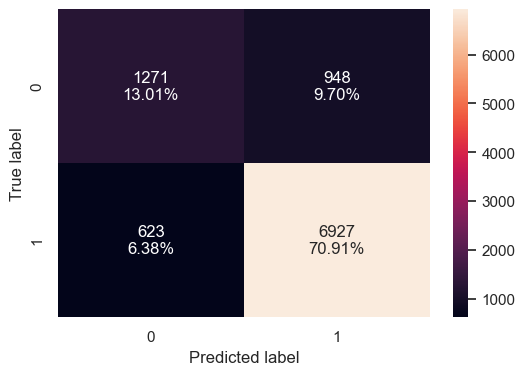

In [26]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [27]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.839185,0.917483,0.879619,0.898152


#### ROC-AUC

* ROC-AUC on training set

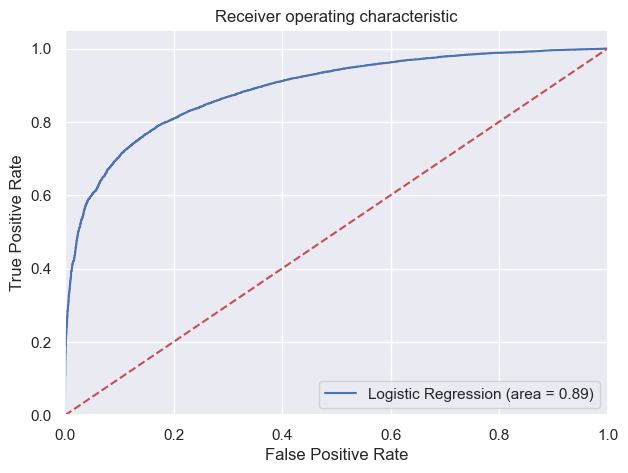

In [28]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

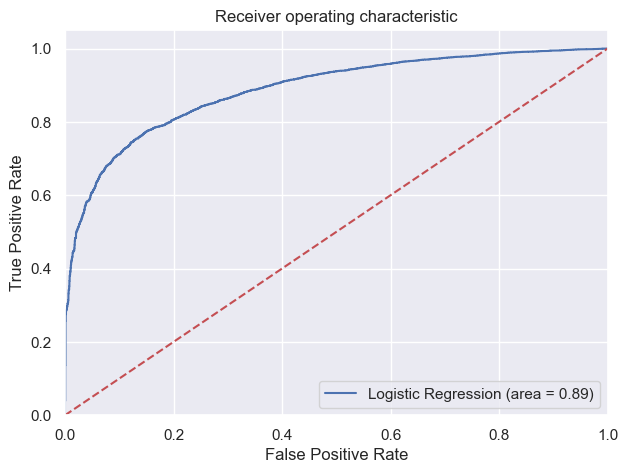

In [29]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

### Model Performance Improvement

#### Let's use Precision-Recall curve and see if we can find a better threshold

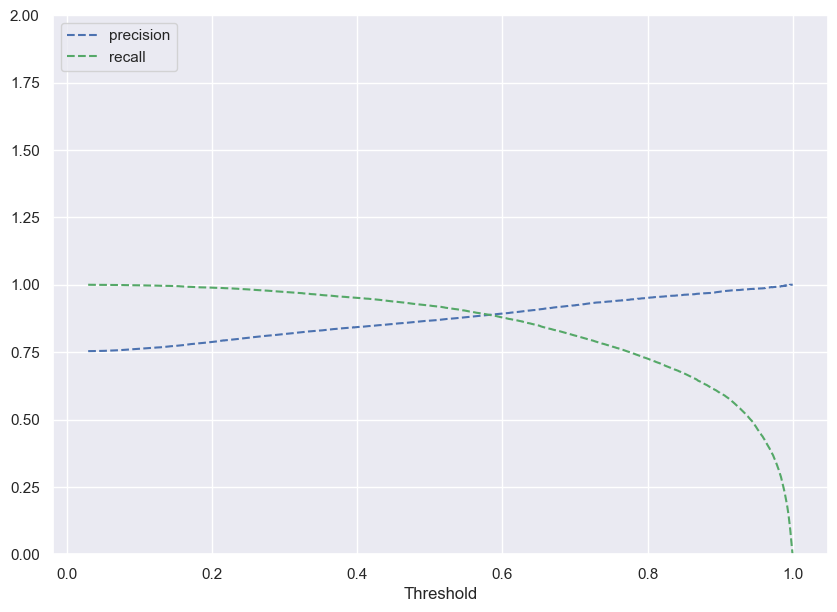

In [44]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 2])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [41]:
pred_prob

array([0.9921129 , 0.99841959, 0.98250074, ..., 0.39072575, 0.9719584 ,
       0.9957176 ])

In [52]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train,0.99999
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.246665,0.0,0.0,0.0


* At the threshold of 0.58, we get balanced recall and precision.

In [63]:
# setting the threshold
optimal_threshold_curve = 0.58

<IPython.core.display.Javascript object>

#### Checking model performance on training set

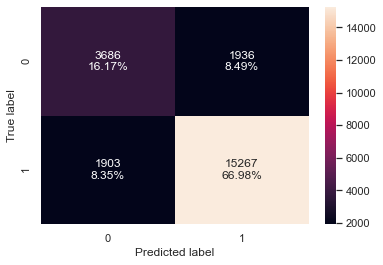

<IPython.core.display.Javascript object>

In [64]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [65]:
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.831564,0.889167,0.887461,0.888314


<IPython.core.display.Javascript object>

#### Checking model performance on test set

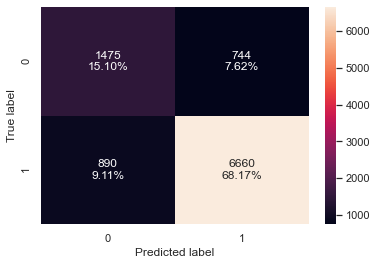

<IPython.core.display.Javascript object>

In [66]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [67]:
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.832736,0.882119,0.899514,0.890732


<IPython.core.display.Javascript object>

* Model is performing well on training and test.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

### Conclusion
- We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89. 
* Coefficient of age, fnlwgt, education_no_of_years,working_hours_per_week,sex_Male, some levels of education and marital_status, occupation, race and native country are negative, increase in these will lead to decrease in chances of a person having <=50K salary. 
* Coefficient of some levels of occupation, race, native country positive increase in these will lead to increase in chances of a person having <=50K salary.